In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import wrangle as w

In [2]:
# plotting defaults
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = w.get_health_data('Record')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269523 entries, 0 to 2269522
Data columns (total 11 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   @type                             object
 1   @sourceName                       object
 2   @sourceVersion                    object
 3   @unit                             object
 4   @creationDate                     object
 5   @startDate                        object
 6   @endDate                          object
 7   @value                            object
 8   MetadataEntry                     object
 9   @device                           object
 10  HeartRateVariabilityMetadataList  object
dtypes: object(11)
memory usage: 190.5+ MB


In [5]:
clean_df = w.clean_records_list(df)

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267590 entries, 0 to 2269522
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   activity_type        object
 1   source               object
 2   source_ver           object
 3   unit_of_measure      object
 4   creation_time        object
 5   activity_start_time  object
 6   activity_end_time    object
 7   value                object
 8   device               object
dtypes: object(9)
memory usage: 173.0+ MB


In [7]:
records_list = w.records_list_time_zone_fun(clean_df)

In [8]:
records_list

activity_type            source source_ver  \
date                                                              
2007-03-06                BodyMass                健康       15.5   
2007-03-06                  Height                健康       15.5   
2015-10-10  DistanceWalkingRunning        Marky Doug      9.0.2   
2015-10-10  DistanceWalkingRunning        Marky Doug      9.0.2   
2015-10-10  DistanceWalkingRunning        Marky Doug      9.0.2   
...                            ...               ...        ...   
2022-12-08               HeartRate  Mark的Apple Watch        9.1   
2022-12-08  DistanceWalkingRunning  Mark的Apple Watch        9.1   
2022-12-08       BasalEnergyBurned  Mark的Apple Watch        9.1   
2022-12-08  DistanceWalkingRunning  Mark的Apple Watch        9.1   
2022-12-08      ActiveEnergyBurned  Mark的Apple Watch        9.1   

           unit_of_measure     value  \
date                                   
2007-03-06              kg     121.4   
2007-03-06              cm     191.0   
2015-10-10              km   0.00144   
2015-10-10              km   0.25881   
2015-10-10              km   0.00276   
...                    ...       ...   
2022-12-08       count/min      98.0   
2022-12-08              km  0.004358   
2022-12-08             Cal     0.083   
2022-12-08              km  0.004358   
2022-12-08             Cal      0.19   

                                                       device  in_china  \
date                                                                      
2007-03-06                                                NaN         0   
2007-03-06                                                NaN         0   
2015-10-10  <<HKDevice: 0x2833bde00>, name:iPhone, manufac...         1   
2015-10-10  <<HKDevice: 0x2833bde00>, name:iPhone, manufac...         1   
2015-10-10  <<HKDevice: 0x2833bde00>, name:iPhone, manufac...         1   
...                                                       ...       ...   
2022-12-08  <<HKDevice: 0x2833a97c0>, name:Apple Watch, ma...         0   
2022-12-08  <<HKDevice: 0x2833fc050>, name:Apple Watch, ma...         0   
2022-12-08  <<HKDevice: 0x2833b8e10>, name:Apple Watch, ma...         0   
2022-12-08  <<HKDevice: 0x2833fc050>, name:Apple Watch, ma...         0   
2022-12-08  <<HKDevice: 0x2833b8e10>, name:Apple Watch, ma...         0   

           start_time end_time      total_time  
date                                            
2007-03-06      16:25    16:25 0 days 00:00:00  
2007-03-06      16:26    16:26 0 days 00:00:00  
2015-10-10      18:48    18:54 0 days 00:06:00  
2015-10-10      18:21    18:26 0 days 00:05:00  
2015-10-10      18:15    18:21 0 days 00:06:00  
...               ...      ...             ...  
2022-12-08      07:28    07:28 0 days 00:00:00  
2022-12-08      07:28    07:28 0 days 00:00:03  
2022-12-08      07:28    07:28 0 days 00:00:03  
2022-12-08      07:28    07:28 0 days 00:00:03  
2022-12-08      12:38    12:39 0 days 00:00:41  

[2267590 rows x 10 columns]

In [9]:
records_list.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2267590 entries, 2007-03-06 to 2022-12-08
Data columns (total 10 columns):
 #   Column           Dtype          
---  ------           -----          
 0   activity_type    object         
 1   source           object         
 2   source_ver       object         
 3   unit_of_measure  object         
 4   value            object         
 5   device           object         
 6   in_china         uint8          
 7   start_time       object         
 8   end_time         object         
 9   total_time       timedelta64[ns]
dtypes: object(8), timedelta64[ns](1), uint8(1)
memory usage: 175.2+ MB


In [10]:
records_list.activity_type.value_counts()

StepCount                         650299
ActiveEnergyBurned                529598
DistanceWalkingRunning            302735
BasalEnergyBurned                 270744
HeartRate                         237855
WalkingSpeed                       38954
WalkingStepLength                  38951
AppleExerciseTime                  37130
WalkingDoubleSupportPercentage     31306
AppleStandTime                     28282
WalkingAsymmetryPercentage         18394
FlightsClimbed                     15171
EnvironmentalAudioExposure         14127
HeadphoneAudioExposure             11075
AppleStandHour                      7273
RespiratoryRate                     5656
SleepAnalysis                       5070
OxygenSaturation                    3239
HeartRateVariabilitySDNN            2587
StairDescentSpeed                   2235
StairAscentSpeed                    1654
DietaryEnergyConsumed               1341
DietaryCarbohydrates                1283
DietaryFatTotal                     1256
DietarySugar    

In [11]:
step_counts = records_list[records_list['activity_type'] == 'StepCount']

In [12]:
step_counts.unit_of_measure.value_counts()

count    650299
Name: unit_of_measure, dtype: int64

In [13]:
step_counts.value = step_counts.value.astype(int)

In [14]:
daily_steps = step_counts['2020/08'].resample('D')[['value']].sum()

<AxesSubplot:xlabel='date'>

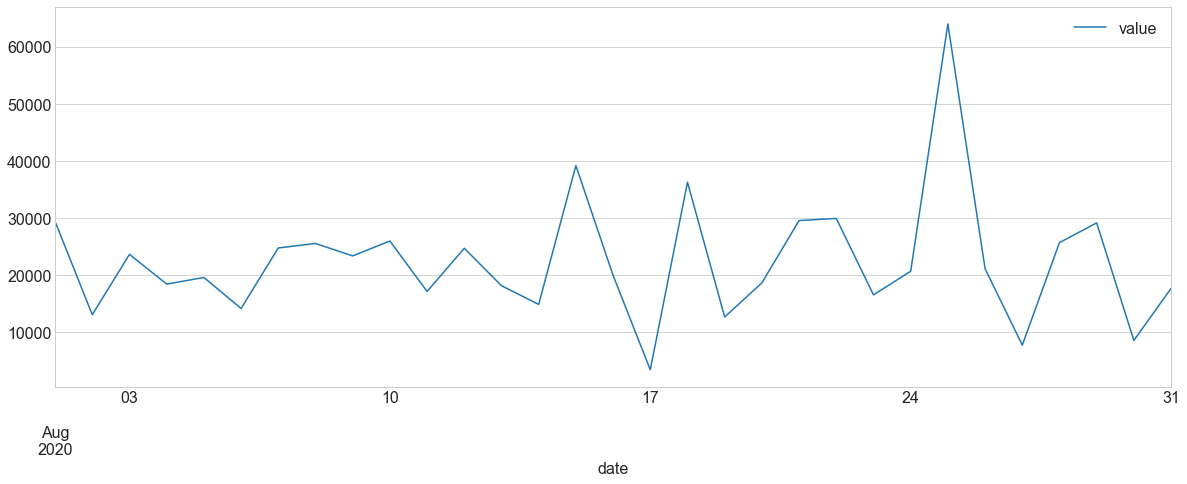

In [15]:
daily_steps.plot()

<AxesSubplot:xlabel='date'>

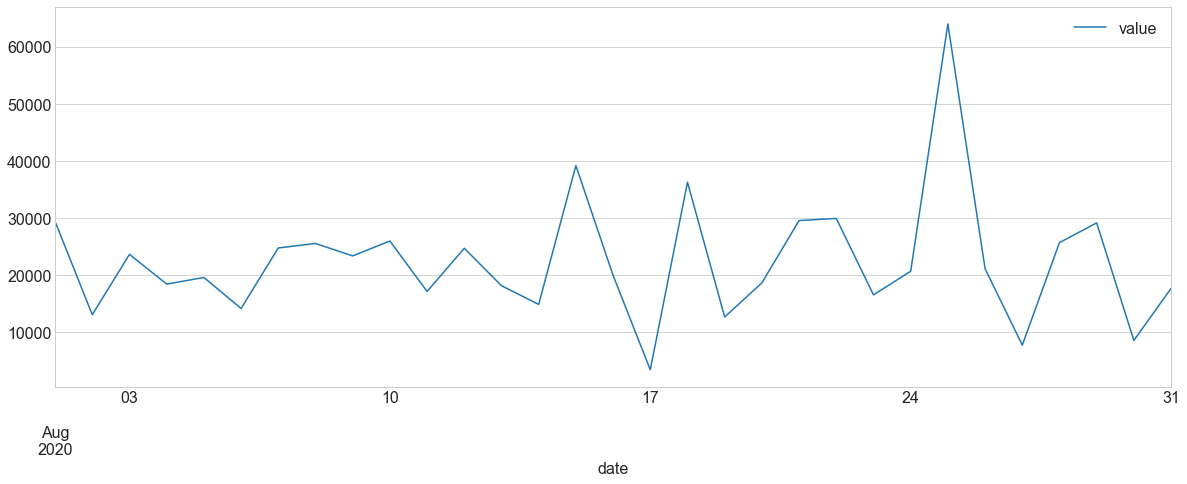

In [16]:
daily_steps['2020/08'].plot()

In [17]:
step_counts['2020-08-25':'2020-08-25']

activity_type      source source_ver unit_of_measure  value  \
date                                                                     
2020-08-25     StepCount  Marky Doug     13.6.1           count      9   
2020-08-25     StepCount  Marky Doug     13.6.1           count      9   
2020-08-25     StepCount  Marky Doug     13.6.1           count     10   
2020-08-25     StepCount  Marky Doug     13.6.1           count      9   
2020-08-25     StepCount  Marky Doug     13.6.1           count      9   
...                  ...         ...        ...             ...    ...   
2020-08-25     StepCount  Marky Doug     13.6.1           count      9   
2020-08-25     StepCount  Marky Doug     13.6.1           count     51   
2020-08-25     StepCount  Marky Doug     13.6.1           count      4   
2020-08-25     StepCount  Marky Doug     13.6.1           count      8   
2020-08-25     StepCount  Marky Doug     13.6.1           count      3   

                                                       device  in_china  \
date                                                                      
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
...                                                       ...       ...   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   
2020-08-25  <<HKDevice: 0x2833be120>, name:iPhone, manufac...         1   

           start_time end_time      total_time  
date                                            
2020-08-25      14:39    14:39 0 days 00:00:06  
2020-08-25      14:39    14:39 0 days 00:00:05  
2020-08-25      14:39    14:39 0 days 00:00:05  
2020-08-25      14:39    14:39 0 days 00:00:05  
2020-08-25      14:39    14:39 0 days 00:00:05  
...               ...      ...             ...  
2020-08-25      14:12    14:12 0 days 00:00:05  
2020-08-25      14:11    14:11 0 days 00:00:28  
2020-08-25      14:10    14:10 0 days 00:00:05  
2020-08-25      14:10    14:10 0 days 00:00:05  
2020-08-25      14:12    14:13 0 days 00:00:03  

[597 rows x 10 columns]

In [18]:
check = step_counts['2020-08-25':'2020-08-25']

In [19]:
check[check.source == '小米运动']

activity_type source    source_ver unit_of_measure  value device  \
date                                                                          
2020-08-25     StepCount   小米运动  202008211750           count    916    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    911    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    913    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    389    NaN   
2020-08-25     StepCount   小米运动  202008211750           count     56    NaN   
2020-08-25     StepCount   小米运动  202008211750           count     62    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    707    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    871    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    778    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    800    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    349    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    784    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    508    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    476    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    184    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    219    NaN   
2020-08-25     StepCount   小米运动  202008211750           count     47    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    825    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    605    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    731    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    453    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    237    NaN   
2020-08-25     StepCount   小米运动  202008211750           count   1111    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    105    NaN   
2020-08-25     StepCount   小米运动  202008211750           count     95    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    248    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    419    NaN   
2020-08-25     StepCount   小米运动  202008211750           count     46    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    824    NaN   
2020-08-25     StepCount   小米运动  202008211750           count   1014    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    951    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    706    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    961    NaN   
2020-08-25     StepCount   小米运动  202008211750           count    800    NaN   
2020-08-25     StepCount   小米运动  202008071855           count     19    NaN   
2020-08-25     StepCount   小米运动  202008071855           count     78    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    179    NaN   
2020-08-25     StepCount   小米运动  202008071855           count     31    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    314    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    206    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    221    NaN   
2020-08-25     StepCount   小米运动  202008071855           count   1033    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    853    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    714    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    560    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    629    NaN   
2020-08-25     StepCount   小米运动  202008071855           count     77    NaN   
2020-08-25     StepCount   小米运动  202008071855           count    322    NaN   
2020-08-25     StepCount   小米运动  202008071855           count

In [20]:
step_counts = step_counts[step_counts.source != '小米运动']

<AxesSubplot:xlabel='date'>

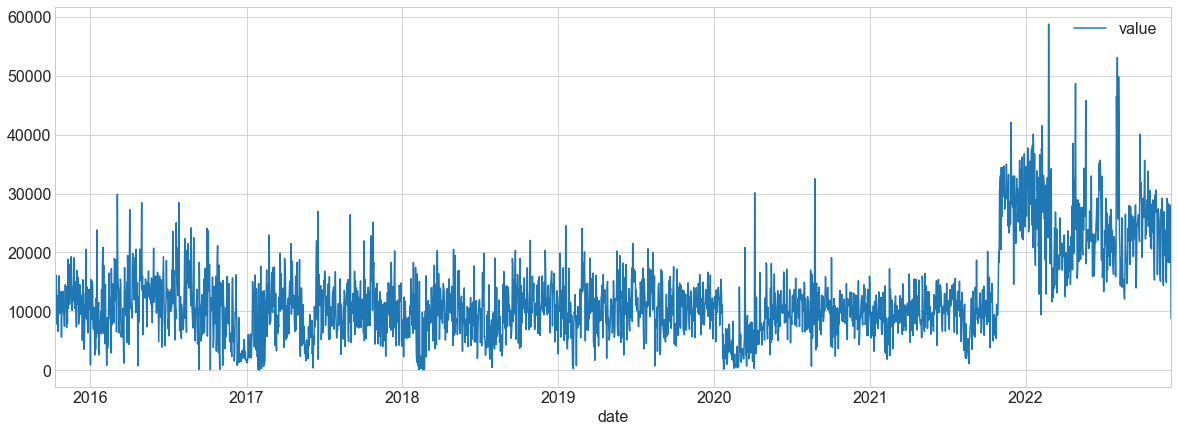

In [21]:
step_counts.resample('D')[['value']].sum().plot()

In [22]:
def get_steps(df):
    df = df[df['activity_type'] == 'StepCount']
    df.value = df.value.astype(int)
    df =df[df.source != '小米运动']
    phone_steps = df[df['source'] == 'Marky Doug']
    apple_watch_steps = df[df['source'] != 'Marky Doug']
    df = phone_steps.loc[:'2021-10-28'].append(apple_watch_steps)

    return df

In [23]:
steps_now = get_steps(records_list)

<AxesSubplot:xlabel='date'>

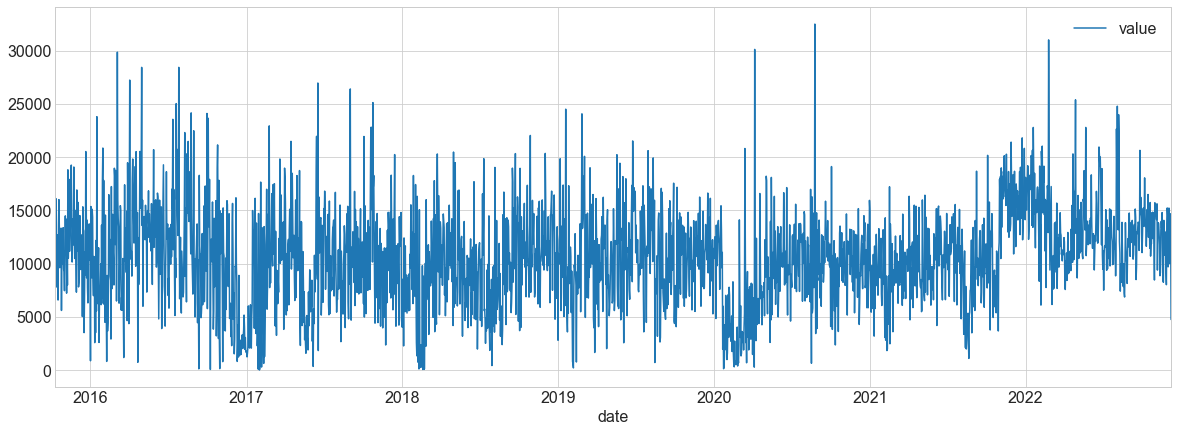

In [24]:
steps_now.resample('D')[['value']].sum().plot()

<AxesSubplot:xlabel='date'>

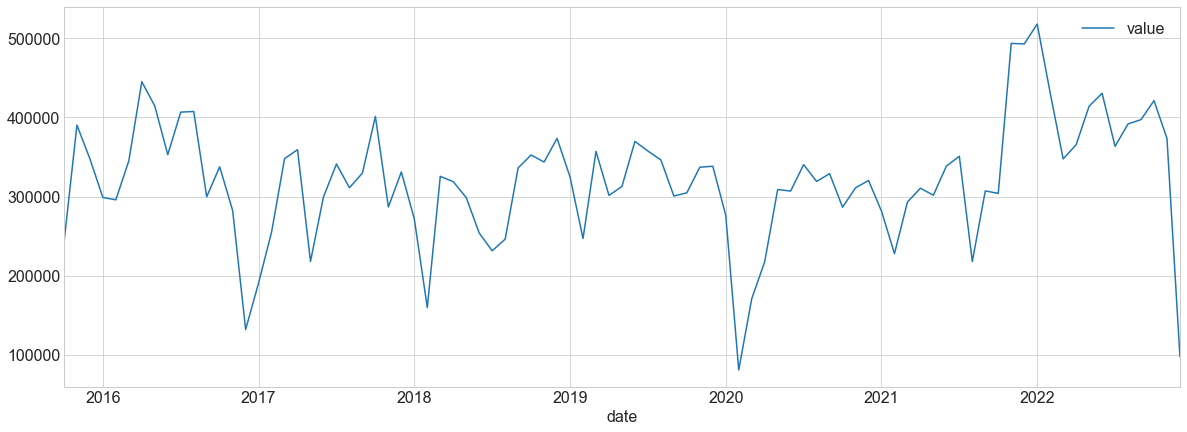

In [25]:
steps_now.resample('M')[['value']].sum().plot()

In [26]:
energy_burned = records_list[records_list['activity_type'] == 'ActiveEnergyBurned']

In [27]:
energy_burned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 529598 entries, 2020-06-18 to 2022-12-08
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   activity_type    529598 non-null  object         
 1   source           529598 non-null  object         
 2   source_ver       529598 non-null  object         
 3   unit_of_measure  529598 non-null  object         
 4   value            529598 non-null  object         
 5   device           503355 non-null  object         
 6   in_china         529598 non-null  uint8          
 7   start_time       529598 non-null  object         
 8   end_time         529598 non-null  object         
 9   total_time       529598 non-null  timedelta64[ns]
dtypes: object(8), timedelta64[ns](1), uint8(1)
memory usage: 40.9+ MB


In [28]:
energy_burned.value = energy_burned.value.astype(int)

In [29]:
energy_burned.describe()

value       in_china                 total_time
count  529598.000000  529598.000000                     529598
mean        0.934637       0.242918  0 days 00:01:01.707491342
std         4.846304       0.428846  0 days 00:02:08.049409430
min         0.000000       0.000000            0 days 00:00:00
25%         0.000000       0.000000            0 days 00:00:03
50%         0.000000       0.000000            0 days 00:00:31
75%         0.000000       0.000000            0 days 00:01:01
max       133.000000       1.000000            0 days 00:28:54

In [30]:
energy_burned

activity_type            source      source_ver  \
date                                                               
2020-06-18  ActiveEnergyBurned              小米运动  202006161124.0   
2020-06-18  ActiveEnergyBurned              小米运动  202006161124.0   
2020-06-19  ActiveEnergyBurned              小米运动  202006161124.0   
2020-06-19  ActiveEnergyBurned              小米运动  202006161124.0   
2020-06-19  ActiveEnergyBurned              小米运动  202006161124.0   
...                        ...               ...             ...   
2022-12-08  ActiveEnergyBurned  Mark的Apple Watch             9.1   
2022-12-08  ActiveEnergyBurned  Mark的Apple Watch             9.1   
2022-12-08  ActiveEnergyBurned  Mark的Apple Watch             9.1   
2022-12-08  ActiveEnergyBurned  Mark的Apple Watch             9.1   
2022-12-08  ActiveEnergyBurned  Mark的Apple Watch             9.1   

           unit_of_measure  value  \
date                                
2020-06-18             Cal      1   
2020-06-18             Cal      1   
2020-06-19             Cal      1   
2020-06-19             Cal      3   
2020-06-19             Cal      3   
...                    ...    ...   
2022-12-08             Cal      0   
2022-12-08             Cal      0   
2022-12-08             Cal      0   
2022-12-08             Cal      0   
2022-12-08             Cal      0   

                                                       device  in_china  \
date                                                                      
2020-06-18                                                NaN         1   
2020-06-18                                                NaN         1   
2020-06-19                                                NaN         1   
2020-06-19                                                NaN         1   
2020-06-19                                                NaN         1   
...                                                       ...       ...   
2022-12-08  <<HKDevice: 0x2833bc820>, name:Apple Watch, ma...         0   
2022-12-08  <<HKDevice: 0x2833bc820>, name:Apple Watch, ma...         0   
2022-12-08  <<HKDevice: 0x2833bc820>, name:Apple Watch, ma...         0   
2022-12-08  <<HKDevice: 0x2833bc820>, name:Apple Watch, ma...         0   
2022-12-08  <<HKDevice: 0x2833b8e10>, name:Apple Watch, ma...         0   

           start_time end_time      total_time  
date                                            
2020-06-18      23:10    23:19 0 days 00:09:59  
2020-06-18      22:50    22:59 0 days 00:09:59  
2020-06-19      22:00    22:09 0 days 00:09:59  
2020-06-19      22:20    22:29 0 days 00:09:59  
2020-06-19      22:30    22:39 0 days 00:09:59  
...               ...      ...             ...  
2022-12-08      07:28    07:28 0 days 00:00:03  
2022-12-08      07:28    07:28 0 days 00:00:03  
2022-12-08      07:28    07:28 0 days 00:00:02  
2022-12-08      07:28    07:28 0 days 00:00:03  
2022-12-08      12:38    12:39 0 days 00:00:41  

[529598 rows x 10 columns]

In [31]:
energy_burned['2021-11-01':'2021-11-01'].value.sum()

2129

In [32]:
pd.options.display.max_rows = 3000

In [33]:
energy_burned['2022-08-10':'2022-08-10'].sort_values(by='start_time')

activity_type            source source_ver unit_of_measure  \
date                                                                          
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7             Cal   
2022-08-10  ActiveEnergyBurned  Mark的Apple Watch        8.7        

<AxesSubplot:xlabel='date'>

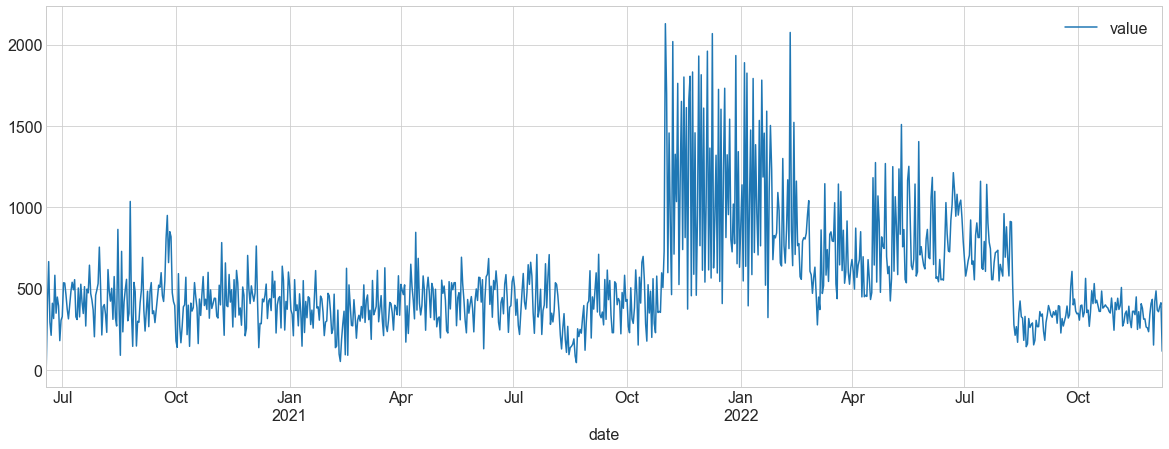

In [34]:
energy_burned.resample('D')[['value']].sum().plot()

- **2021-10-28** purchase Apple Watch. 
- **2022-02-16** last day at gym in Kunming.
- **2022-03-02** Moved back to the States.

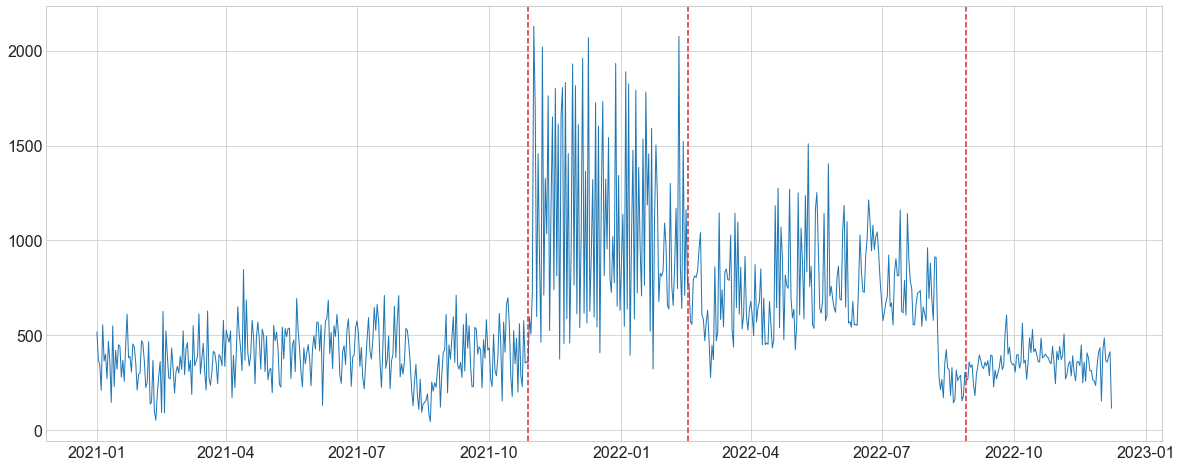

In [35]:
plt.figure(figsize = (20,8))
plt.plot(energy_burned['2021-01-01':].resample('D')[['value']].sum(), linewidth=1)
#plt.plot(energy_burned[:'2021-10-28'].resample('D')[['value']].sum(), label='Pre-Watch', linewidth=1)
plt.axvline(dt.datetime(2021,10,28), color='tab:red', linestyle= '--')
#plt.plot(energy_burned['2021-10-28':'2022-02-16'].resample('D')[['value']].sum(), label='Watch Gym', linewidth=1)
plt.axvline(dt.datetime(2022,2,16), color='tab:red', linestyle= '--')
#plt.plot(energy_burned['2022-02-17':'2022-08-29'].resample('D')[['value']].sum(), label='After Gym', linewidth=1)
#plt.plot(energy_burned['2022-08-29':].resample('D')[['value']].sum(), label='Start Codeup', linewidth=1)
plt.axvline(dt.datetime(2022,8,29), color='tab:red', linestyle= '--')

plt.show()

In [36]:
import matplotlib.dates as mdates

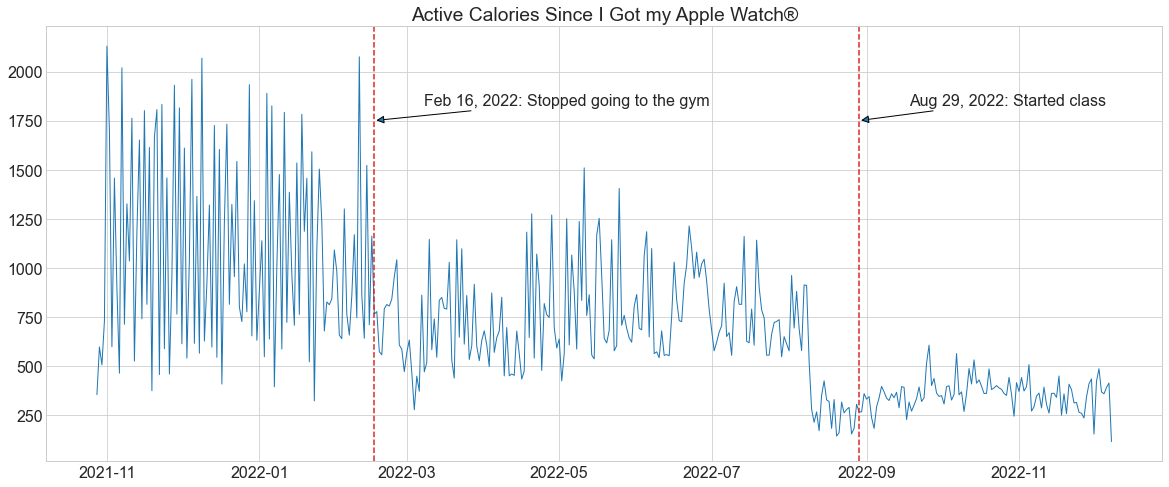

In [37]:
plt.figure(figsize = (20,8))
plt.plot(energy_burned['2021-10-28':].resample('D')[['value']].sum(), linewidth=1)
plt.axvline(dt.datetime(2022,2,16), color='tab:red', linestyle= '--')
plt.annotate('Feb 16, 2022: Stopped going to the gym',(mdates.date2num(dt.datetime(2022,2,16)), 1750), xytext=(50, 15),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
plt.axvline(dt.datetime(2022,8,29), color='tab:red', linestyle= '--')
plt.annotate('Aug 29, 2022: Started class',(mdates.date2num(dt.datetime(2022,8,29)), 1750), xytext=(50, 15),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
plt.title('Active Calories Since I Got my Apple Watch®')

plt.show()

In [38]:
energy_burned.source.value_counts()

Mark的Apple Watch    503355
小米运动                 26243
Name: source, dtype: int64

In [39]:
xiaomi_energy = energy_burned[energy_burned.source=='小米运动']

<AxesSubplot:xlabel='date'>

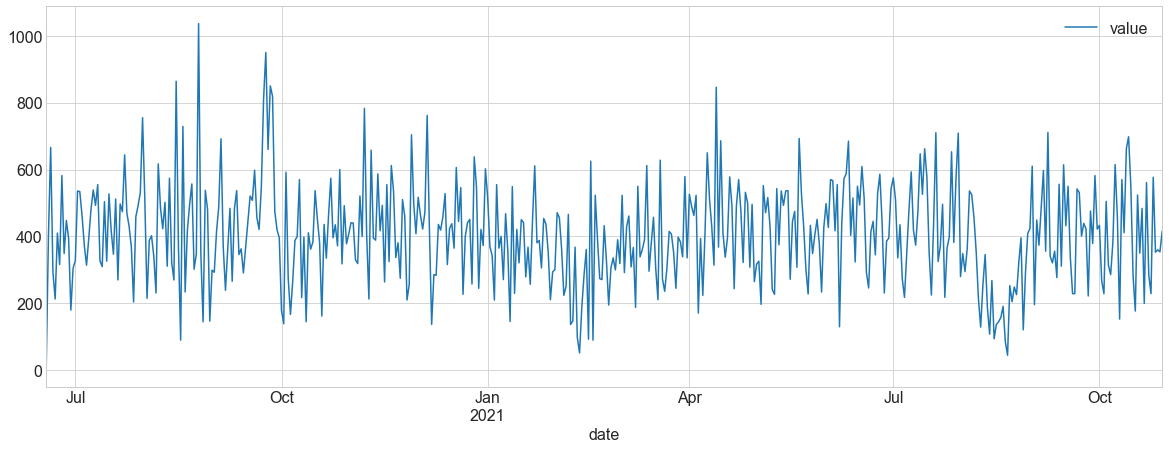

In [40]:
xiaomi_energy.resample('D')[['value']].sum().plot()

In [41]:
xiaomi_records = records_list[records_list.source == '小米运动']

In [42]:
xiaomi_records.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58015 entries, 2020-04-18 to 2021-12-01
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   activity_type    58015 non-null  object         
 1   source           58015 non-null  object         
 2   source_ver       58015 non-null  object         
 3   unit_of_measure  55540 non-null  object         
 4   value            58015 non-null  object         
 5   device           0 non-null      object         
 6   in_china         58015 non-null  uint8          
 7   start_time       58015 non-null  object         
 8   end_time         58015 non-null  object         
 9   total_time       58015 non-null  timedelta64[ns]
dtypes: object(8), timedelta64[ns](1), uint8(1)
memory usage: 4.5+ MB


In [43]:
xiaomi_records.activity_type.value_counts()

StepCount             29271
ActiveEnergyBurned    26243
SleepAnalysis          2475
HeartRate                24
BodyMassIndex             1
BodyMass                  1
Name: activity_type, dtype: int64

In [44]:
records_list.source.value_counts()

Mark的Apple Watch    1373492
Marky Doug           822733
小米运动                  58015
Lose It!              10921
香山健康                    696
Renpho Health           600
Renpho                  574
健康                      249
时钟                      168
FatSecret               124
血氧                       11
Mark的iPhone               7
Name: source, dtype: int64

In [45]:
records_list[records_list.source=='Lose It!']

activity_type    source source_ver unit_of_measure  \
date                                                                     
2022-09-06     DietaryCholesterol  Lose It!          1              mg   
2022-09-06         DietaryProtein  Lose It!          1               g   
2022-09-06   DietaryCarbohydrates  Lose It!          1               g   
2022-09-06           DietaryFiber  Lose It!          1               g   
2022-09-06          DietarySodium  Lose It!          1              mg   
...                           ...       ...        ...             ...   
2022-12-08   DietaryCarbohydrates  Lose It!          0               g   
2022-12-08  DietaryEnergyConsumed  Lose It!          0             Cal   
2022-12-08   DietaryCarbohydrates  Lose It!          0               g   
2022-12-08        DietaryFatTotal  Lose It!          0               g   
2022-12-08          DietarySodium  Lose It!          0              mg   

               value device  in_china start_time end_time total_time  
date                                                                  
2022-09-06     137.5    NaN         0      11:42    11:42     0 days  
2022-09-06      27.5    NaN         0      11:42    11:42     0 days  
2022-09-06       5.0    NaN         0      11:42    11:42     0 days  
2022-09-06       0.0    NaN         0      11:42    11:42     0 days  
2022-09-06      70.0    NaN         0      11:42    11:42     0 days  
...              ...    ...       ...        ...      ...        ...  
2022-12-08      17.0    NaN         0      09:00    09:00     0 days  
2022-12-08     190.0    NaN         0      09:00    09:00     0 days  
2022-12-08   5.26308    NaN         0      09:00    09:00     0 days  
2022-12-08       1.0    NaN         0      09:00    09:00     0 days  
2022-12-08  0.250623    NaN         0      09:00    09:00     0 days  

[10921 rows x 10 columns]

In [46]:
sleep_info = records_list[records_list.activity_type=='SleepAnalysis']

In [47]:
sleep_info.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5070 entries, 2016-10-10 to 2022-12-08
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   activity_type    5070 non-null   object         
 1   source           5070 non-null   object         
 2   source_ver       5031 non-null   object         
 3   unit_of_measure  0 non-null      object         
 4   value            5070 non-null   object         
 5   device           168 non-null    object         
 6   in_china         5070 non-null   uint8          
 7   start_time       5070 non-null   object         
 8   end_time         5070 non-null   object         
 9   total_time       5070 non-null   timedelta64[ns]
dtypes: object(8), timedelta64[ns](1), uint8(1)
memory usage: 401.0+ KB


In [48]:
sleep_info

activity_type            source source_ver unit_of_measure  \
date                                                                     
2016-10-10  SleepAnalysis                时钟         50             NaN   
2016-10-11  SleepAnalysis                时钟         50             NaN   
2016-10-12  SleepAnalysis                时钟         50             NaN   
2016-10-12  SleepAnalysis                时钟         50             NaN   
2016-10-12  SleepAnalysis                时钟         50             NaN   
...                   ...               ...        ...             ...   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   

                                             value  \
date                                                 
2016-10-10       HKCategoryValueSleepAnalysisInBed   
2016-10-11       HKCategoryValueSleepAnalysisInBed   
2016-10-12       HKCategoryValueSleepAnalysisInBed   
2016-10-12       HKCategoryValueSleepAnalysisInBed   
2016-10-12       HKCategoryValueSleepAnalysisInBed   
...                                            ...   
2022-12-08  HKCategoryValueSleepAnalysisAsleepCore   
2022-12-08  HKCategoryValueSleepAnalysisAsleepCore   
2022-12-08   HKCategoryValueSleepAnalysisAsleepREM   
2022-12-08   HKCategoryValueSleepAnalysisAsleepREM   
2022-12-08  HKCategoryValueSleepAnalysisAsleepCore   

                                                       device  in_china  \
date                                                                      
2016-10-10  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...         1   
2016-10-11  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...         1   
2016-10-12  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...         1   
2016-10-12  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...         1   
2016-10-12  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...         1   
...                                                       ...       ...   
2022-12-08                                                NaN         0   
2022-12-08                                                NaN         0   
2022-12-08                                                NaN         0   
2022-12-08                                                NaN         0   
2022-12-08                                                NaN         0   

           start_time end_time      total_time  
date                                            
2016-10-10      21:45    06:30 0 days 08:45:50  
2016-10-11      22:30    03:18 0 days 04:48:56  
2016-10-12      22:37    07:00 0 days 08:22:59  
2016-10-12      06:32    06:41 0 days 00:08:36  
2016-10-12      04:01    04:09 0 days 00:08:36  
...               ...      ...             ...  
2022-12-08      00:12    01:42 0 days 01:29:30  
2022-12-08      04:26    05:58 0 days 01:32:00  
2022-12-08      01:42    02:10 0 days 00:28:00  
2022-12-08      05:58    06:22 0 days 00:24:30  
2022-12-08      06:22    06:28 0 days 00:06:00  

[5070 rows x 10 columns]

In [49]:
sleep_info['value'] = sleep_info['value'].str.replace('HKCategoryValueSleepAnalysis', '')

In [50]:
sleep_info

activity_type            source source_ver unit_of_measure  \
date                                                                     
2016-10-10  SleepAnalysis                时钟         50             NaN   
2016-10-11  SleepAnalysis                时钟         50             NaN   
2016-10-12  SleepAnalysis                时钟         50             NaN   
2016-10-12  SleepAnalysis                时钟         50             NaN   
2016-10-12  SleepAnalysis                时钟         50             NaN   
...                   ...               ...        ...             ...   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   
2022-12-08  SleepAnalysis  Mark的Apple Watch        9.1             NaN   

                 value                                             device  \
date                                                                        
2016-10-10       InBed  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...   
2016-10-11       InBed  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...   
2016-10-12       InBed  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...   
2016-10-12       InBed  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...   
2016-10-12       InBed  <<HKDevice: 0x2833bcbe0>, name:iPhone, manufac...   
...                ...                                                ...   
2022-12-08  AsleepCore                                                NaN   
2022-12-08  AsleepCore                                                NaN   
2022-12-08   AsleepREM                                                NaN   
2022-12-08   AsleepREM                                                NaN   
2022-12-08  AsleepCore                                                NaN   

            in_china start_time end_time      total_time  
date                                                      
2016-10-10         1      21:45    06:30 0 days 08:45:50  
2016-10-11         1      22:30    03:18 0 days 04:48:56  
2016-10-12         1      22:37    07:00 0 days 08:22:59  
2016-10-12         1      06:32    06:41 0 days 00:08:36  
2016-10-12         1      04:01    04:09 0 days 00:08:36  
...              ...        ...      ...             ...  
2022-12-08         0      00:12    01:42 0 days 01:29:30  
2022-12-08         0      04:26    05:58 0 days 01:32:00  
2022-12-08         0      01:42    02:10 0 days 00:28:00  
2022-12-08         0      05:58    06:22 0 days 00:24:30  
2022-12-08         0      06:22    06:28 0 days 00:06:00  

[5070 rows x 10 columns]

In [51]:
sleep_info.value.value_counts()

AsleepUnspecified    2431
InBed                1081
AsleepCore            740
AsleepREM             353
Awake                 245
AsleepDeep            220
Name: value, dtype: int64

In [52]:
sleep_info.source.value_counts()

小米运动                2475
Mark的Apple Watch    1694
Marky Doug           733
时钟                   168
Name: source, dtype: int64

In [53]:
sleep_info.groupby('value').total_time.sum()

value
AsleepCore           12 days 11:38:00
AsleepDeep            2 days 13:35:00
AsleepREM             5 days 13:37:30
AsleepUnspecified    55 days 12:54:33
Awake                 0 days 10:46:42
InBed               242 days 22:51:52
Name: total_time, dtype: timedelta64[ns]

In [54]:
pd.DataFrame(sleep_info.groupby(['date','value']).total_time.sum())

total_time
date       value                            
2016-10-10 InBed             0 days 08:45:50
2016-10-11 InBed             0 days 04:48:56
2016-10-12 InBed             0 days 11:17:19
2016-10-13 InBed             0 days 08:12:36
2016-10-14 InBed             0 days 00:05:22
2016-10-16 InBed             0 days 08:05:31
2016-10-17 InBed             0 days 08:14:56
2016-10-18 InBed             0 days 07:35:38
2016-10-19 InBed             0 days 08:14:33
2016-10-23 InBed             0 days 08:10:23
2016-10-24 InBed             0 days 07:24:33
2016-10-25 InBed             0 days 07:42:49
2016-10-26 InBed             0 days 07:15:52
2016-10-27 InBed             0 days 08:03:32
2016-10-30 InBed             0 days 14:28:20
2016-10-31 InBed             0 days 00:09:20
2016-11-01 InBed             0 days 14:09:00
2016-11-02 InBed             0 days 07:55:56
2016-11-03 InBed             0 days 07:04:24
2016-11-04 InBed             0 days 00:05:19
2016-11-06 InBed             0 days 08:14:37
2016-11-07 InBed             0 days 07:59:44
2016-11-08 InBed             0 days 07:08:12
2016-11-09 InBed             0 days 06:42:08
2016-11-10 InBed             0 days 00:13:48
2016-11-11 InBed             0 days 06:51:08
2016-11-15 InBed             0 days 07:43:04
2016-11-16 InBed             0 days 07:46:45
2016-11-17 InBed             0 days 08:36:37
2016-11-20 InBed             0 days 07:32:40
2016-11-28 InBed             0 days 07:56:52
2016-11-29 InBed             0 days 06:52:24
2016-11-30 InBed             0 days 06:43:06
2016-12-01 InBed             0 days 07:33:20
2016-12-04 InBed             0 days 07:50:44
2016-12-05 InBed             0 days 07:51:23
2016-12-06 InBed             0 days 07:51:08
2016-12-07 InBed             0 days 06:16:34
2016-12-08 InBed             0 days 07:29:14
2017-05-22 InBed             0 days 08:40:28
2017-05-23 InBed             0 days 08:36:53
2017-05-24 InBed             0 days 08:11:52
2017-05-25 InBed             0 days 08:06:20
2017-05-26 InBed             0 days 00:03:16
2017-05-28 InBed             0 days 07:52:50
2017-05-29 InBed             0 days 07:04:12
2017-05-30 InBed             0 days 06:33:20
2017-05-31 InBed             0 days 07:34:32
2017-06-01 InBed             0 days 06:24:36
2017-06-02 InBed             0 days 00:10:56
2017-06-04 InBed             0 days 07:00:14
2017-06-11 InBed             0 days 08:44:56
2017-06-12 InBed             0 days 08:17:04
2017-06-13 InBed             0 days 09:11:43
2017-06-14 InBed             0 days 09:02:12
2017-06-15 InBed             0 days 08:41:27
2017-06-16 InBed             0 days 00:09:20
2017-06-18 InBed             0 days 08:31:12
2017-06-19 InBed             0 days 08:45:21
2017-06-25 InBed             0 days 08:36:12
2017-06-26 InBed             0 days 08:30:20
2017-06-27 InBed             0 days 08:39:12
2017-06-28 InBed             0 days 07:36:13
2017-06-29 InBed             0 days 01:16:56
2017-06-30 InBed             0 days 03:05:44
2017-07-03 InBed             0 days 06:27:04
2017-07-04 InBed             0 days 09:20:35
2017-07-05 InBed             0 days 08:10:04
2017-07-06 InBed             0 days 08:50:26
2017-07-08 InBed             0 days 02:56:24
2017-07-09 InBed             0 days 13:03:49
2017-07-10 InBed             0 days 08:23:01
2017-07-11 InBed             0 days 08:00:07
2017-07-12 InBed             0 days 07:54:32
2017-07-13 InBed             0 days 08:39:48
2017-07-16 InBed             0 days 08:30:19
2017-07-17 InBed             0 days 08:10:36
2017-07-18 InBed             0 days 00:04:01
2017-07-19 InBed             0 days 03:40:57
2017-07-20 InBed             0 days 06:26:57
2019-10-21 InBed             0 days 01:28:34
2019-10-24 InBed             0 days 11:33:13
2019-10-27 InBed             0 days 08:15:02
2019-10-28 InBed             0 days 08:15:09
2019-10-31 InBed             0 days 08:05:06
2019-11-03 InBed             0 days 08:05:06
2019-11-06 InBed             0 days 08:05:12
2019-11-07 InBed             

In [55]:
inbed_time = sleep_info[sleep_info.value == 'InBed']

In [175]:
from matplotlib.dates import DateFormatter, date2num, HourLocator
import matplotlib.ticker

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(inbed_time['start_time'], df['val'])    

def timeTicks(x, pos):
    seconds = x / 10**9
    d = datetime.timedelta(seconds=seconds)
    return str(d)

formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax.xaxis.set_major_formatter(formatter)

<BarContainer object of 25 artists>

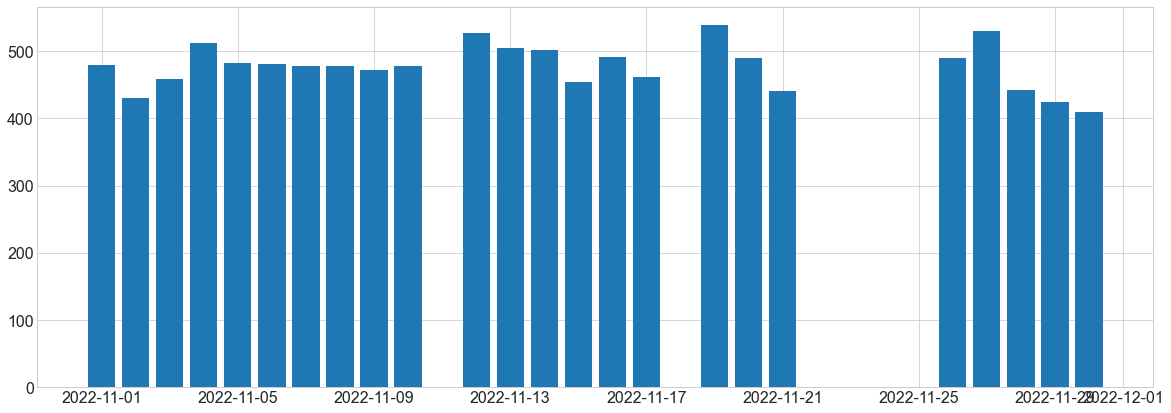

In [69]:
plt.bar(inbed_time['2022-11'].index, inbed_time['2022-11'].total_time.dt.total_seconds()/60)

In [138]:
def plot_sleep_hours(df, year=0, month=0):
    '''
    Takes in sleep data df, year (>2010), month(numeric) and
    plots the total sleep hours for the whole dataset or 
    of the time frame you set.
    '''
    if (year > 2010) & (month > 0) & (month <=12):
        df = df[f'{year}-{month}']
        plt.bar(df.index, (df.total_time.dt.total_seconds()/60)/60)
        plt.title(f'Total number of Hours Slept by Day in {year}-{month}')
        plt.xlabel('Date')
        plt.ylabel('Hours')
        plt.axhline(y = ((df.total_time.dt.total_seconds()/60)/60).mean(), color = 'r', linestyle = '--', label=f'Average Sleep in Hours {((df.total_time.dt.total_seconds()/60)/60).mean():.2f}')
        plt.legend(loc='upper right', frameon=True)
        plt.show()
    elif (year > 2010):
        df = df[f'{year}']
        plt.bar(df.index, (df.total_time.dt.total_seconds()/60)/60)
        plt.title(f'Total number of Hours Slept by Day in {year}')
        plt.xlabel('Date')
        plt.ylabel('Hours')
        plt.axhline(y = ((df.total_time.dt.total_seconds()/60)/60).mean(), color = 'r', linestyle = '--', label=f'Average Sleep in Hours {((df.total_time.dt.total_seconds()/60)/60).mean():.2f}')
        plt.legend(loc='upper right', frameon=True)
        plt.show()
    else:
        plt.bar(df.index, (df.total_time.dt.total_seconds()/60)/60)
        plt.title(f'Total number of Hours Slept by Day')
        plt.xlabel('Date')
        plt.ylabel('Hours')
        plt.axhline(y = ((df.total_time.dt.total_seconds()/60)/60).mean(), color = 'r', linestyle = '--', label=f'Average Sleep in Hours {((df.total_time.dt.total_seconds()/60)/60).mean():.2f}')
        plt.legend(loc='upper right', frameon=True)
        plt.show()

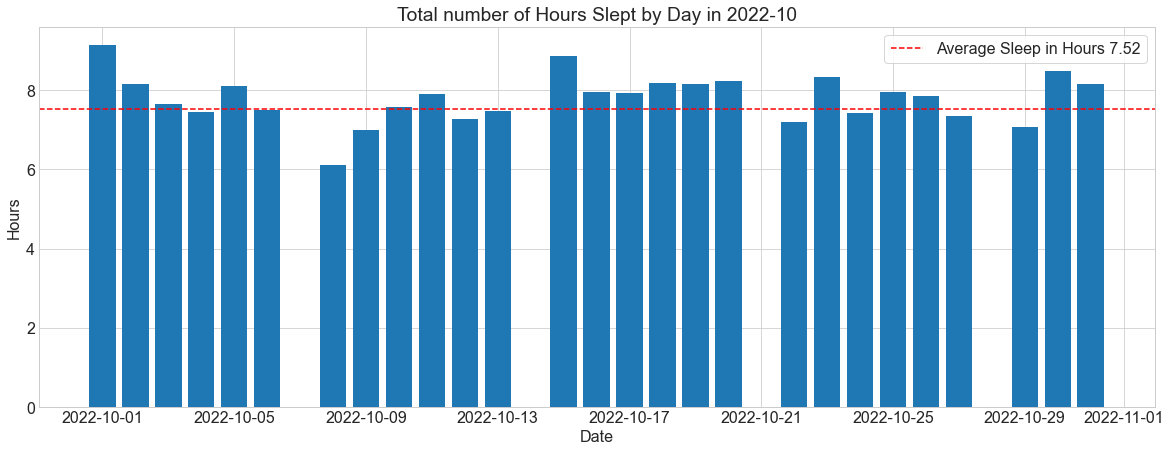

In [142]:
plot_sleep_minutes(inbed_time, 2022, 10)

## BasalEnergyBurned
What influences BasalEnergyBurned?
- weight?
- steps?
- body fat percentage?

In [143]:
basal_energy = records_list[records_list.activity_type=='BasalEnergyBurned']

In [148]:
weight = records_list[records_list.activity_type=='BodyMass']

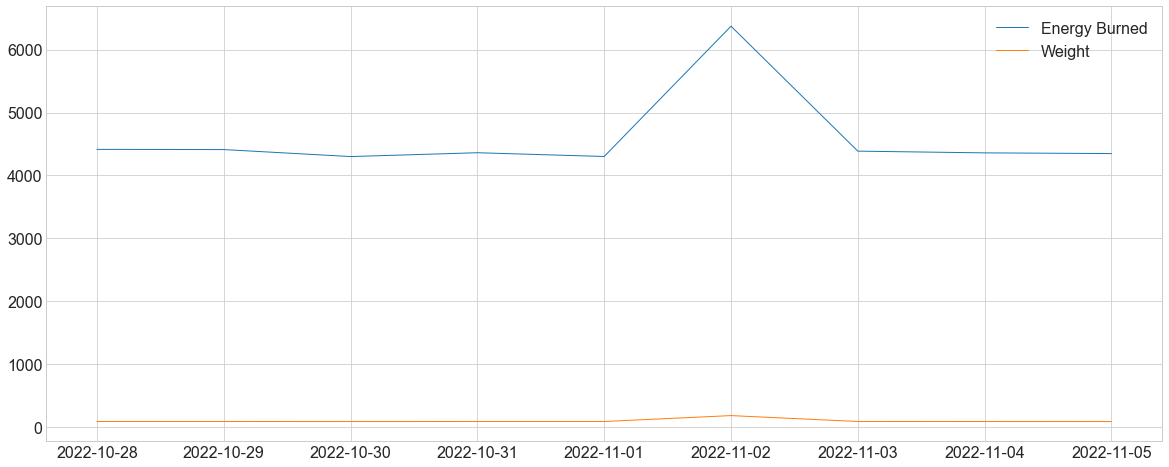

In [172]:
plt.figure(figsize = (20,8))
plt.plot(basal_energy['2022-10-28':'2022-11-05'].resample('D')[['value']].sum(), label='Energy Burned', linewidth=1)
plt.plot(weight['2022-10-28':'2022-11-05'].resample('D')[['value']].sum(), label='Weight', linewidth=1)
plt.legend()
plt.show()

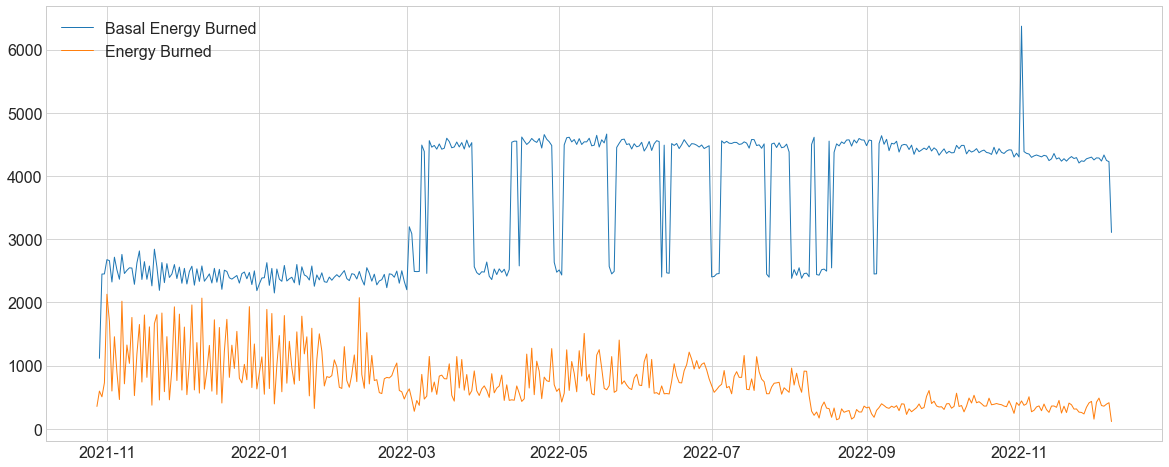

In [203]:
plt.figure(figsize = (20,8))
plt.plot(basal_energy['2021-10-28':].resample('D')[['value']].sum(), label='Basal Energy Burned', linewidth=1)

plt.plot(energy_burned['2021-10-28':].resample('D')[['value']].sum(), label='Energy Burned', linewidth=1)
plt.legend()
plt.show()

Looks like weight and basal energy burned have a correlation.

<AxesSubplot:xlabel='date'>

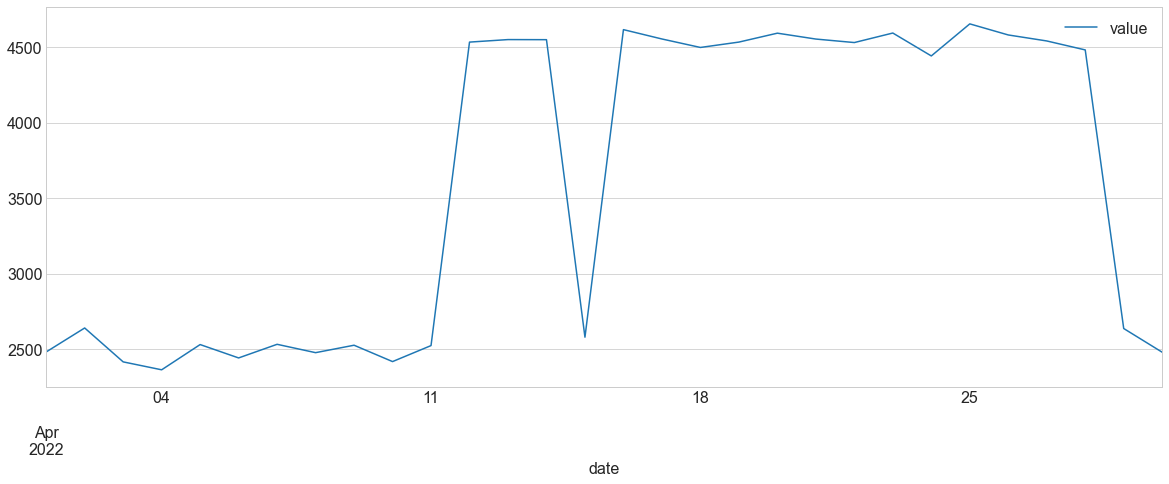

In [166]:
basal_energy['2022-04'].resample('D')[['value']].sum().plot()

<AxesSubplot:xlabel='date'>

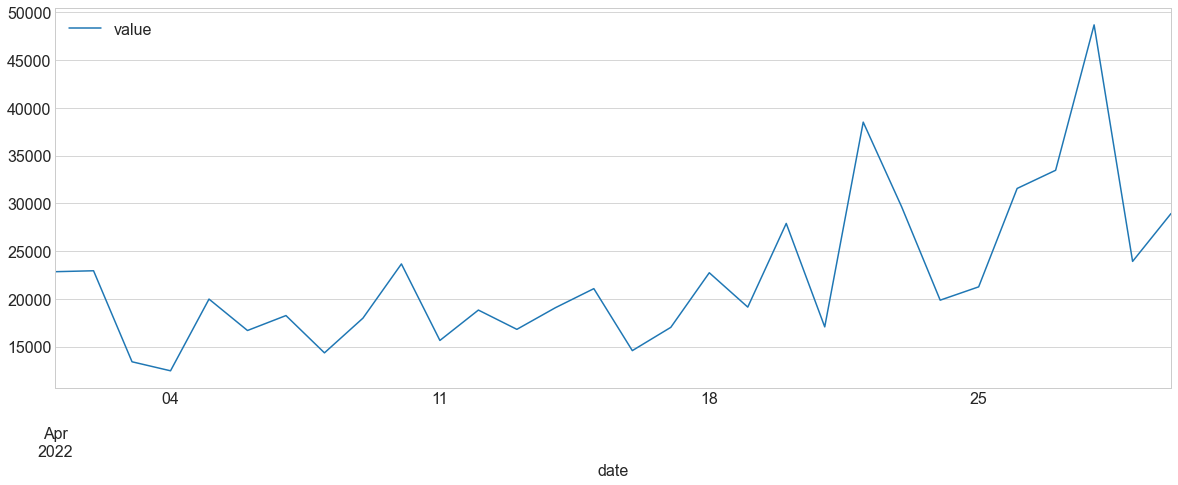

In [165]:
step_counts['2022-04'].resample('D')[['value']].sum().plot()

In [175]:
heart_rate = records_list[records_list.activity_type=='HeartRate']

In [256]:
heart_rate

activity_type            source    source_ver unit_of_measure  \
date                                                                       
2020-05-05     HeartRate                健康        13.4.1       count/min   
2020-07-07     HeartRate              小米运动  202006161124       count/min   
2020-07-19     HeartRate              小米运动  202007102324       count/min   
2020-08-06     HeartRate              小米运动  202008042134       count/min   
2020-08-21     HeartRate              小米运动  202008071855       count/min   
...                  ...               ...           ...             ...   
2022-12-08     HeartRate  Mark的Apple Watch           9.1       count/min   
2022-12-08     HeartRate  Mark的Apple Watch           9.1       count/min   
2022-12-08     HeartRate  Mark的Apple Watch           9.1       count/min   
2022-12-08     HeartRate  Mark的Apple Watch           9.1       count/min   
2022-12-08     HeartRate  Mark的Apple Watch           9.1       count/min   

            value                                             device  \
date                                                                   
2020-05-05   73.0                                                NaN   
2020-07-07   93.0                                                NaN   
2020-07-19   76.0                                                NaN   
2020-08-06  109.0                                                NaN   
2020-08-21   75.0                                                NaN   
...           ...                                                ...   
2022-12-08   97.0  <<HKDevice: 0x2833a97c0>, name:Apple Watch, ma...   
2022-12-08   98.0  <<HKDevice: 0x2833a97c0>, name:Apple Watch, ma...   
2022-12-08   96.0  <<HKDevice: 0x2833a97c0>, name:Apple Watch, ma...   
2022-12-08   97.0  <<HKDevice: 0x2833a97c0>, name:Apple Watch, ma...   
2022-12-08   98.0  <<HKDevice: 0x2833a97c0>, name:Apple Watch, ma...   

            in_china start_time end_time      total_time  
date                                                      
2020-05-05         1      18:00    18:00 0 days 00:00:00  
2020-07-07         1      11:48    11:48 0 days 00:00:59  
2020-07-19         1      21:58    21:58 0 days 00:00:59  
2020-08-06         1      22:00    22:00 0 days 00:00:59  
2020-08-21         1      09:13    09:13 0 days 00:00:59  
...              ...        ...      ...             ...  
2022-12-08         0      07:29    07:29 0 days 00:00:00  
2022-12-08         0      07:29    07:29 0 days 00:00:00  
2022-12-08         0      07:28    07:28 0 days 00:00:00  
2022-12-08         0      07:28    07:28 0 days 00:00:00  
2022-12-08         0      07:28    07:28 0 days 00:00:00  

[237855 rows x 10 columns]

In [187]:
mean = heart_rate['2021-11':].value.mean()

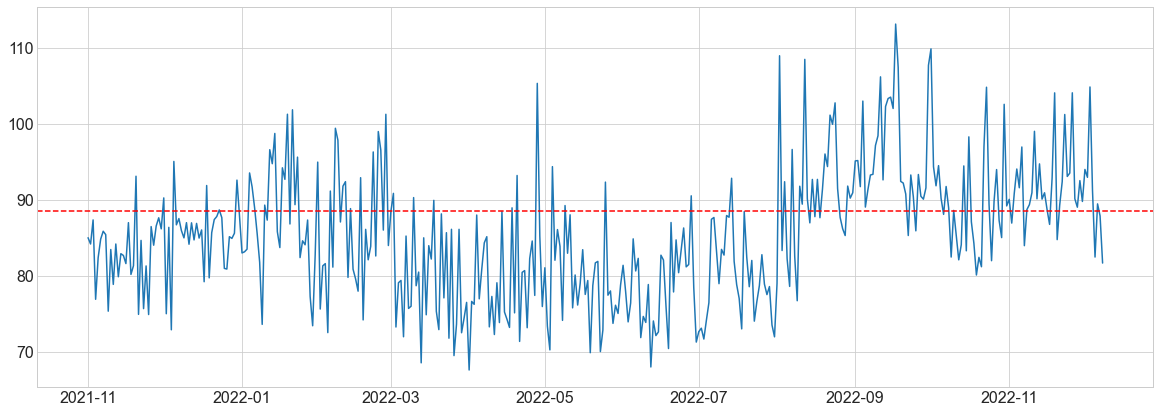

In [188]:
plt.plot(heart_rate['2021-11':].resample('D')[['value']].mean())
plt.axhline(y = mean, color = 'r', linestyle = '--', 
            label=f'Average Heart Rate {mean:.2f}')
                 
            

In [194]:
heart_rate['2022-11-03':'2022-11-03'].sort_values(by='start_time')

activity_type            source source_ver unit_of_measure  \
date                                                                    
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min   
2022-11-03     HeartRate  Mark的Apple Watch      9.0.2       count/min

In [195]:
AppleExerciseTime = records_list[records_list.activity_type=='AppleExerciseTime']

In [196]:
AppleExerciseTime['2022-11-03':'2022-11-03'].sort_values(by='start_time')

activity_type            source source_ver unit_of_measure  \
date                                                                         
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Apple Watch      9.0.2             min   
2022-11-03  AppleExerciseTime  Mark的Ap

In [197]:
RestingHeartRate = records_list[records_list.activity_type=='RestingHeartRate']

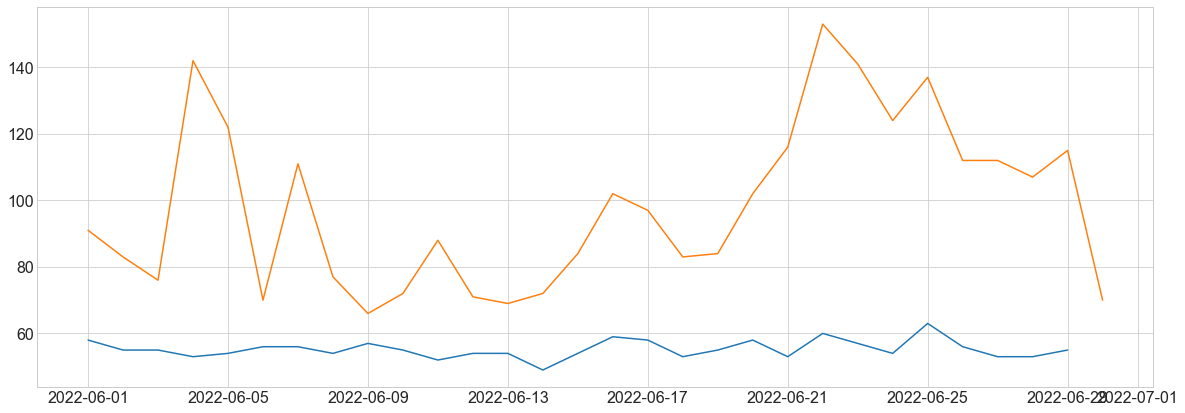

In [206]:
plt.plot(RestingHeartRate['2022-06'].value)
plt.plot(AppleExerciseTime['2022-06'].resample('d')[['value']].sum())

In [210]:
RestingHeartRate

activity_type            source source_ver unit_of_measure  \
date                                                                        
2021-10-29  RestingHeartRate  Mark的Apple Watch        8.0       count/min   
2021-10-30  RestingHeartRate  Mark的Apple Watch        8.0       count/min   
2021-10-31  RestingHeartRate  Mark的Apple Watch        8.0       count/min   
2021-11-01  RestingHeartRate  Mark的Apple Watch        8.0       count/min   
2021-11-02  RestingHeartRate  Mark的Apple Watch        8.0       count/min   
2021-11-03  RestingHeartRate  Mark的Apple Watch        8.0       count/min   
2021-11-04  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-05  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-06  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-07  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-08  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-09  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-10  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-11  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-12  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-13  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-14  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-15  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-16  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-17  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-18  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-19  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-20  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-21  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-22  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-23  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-24  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-25  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-26  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-27  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-28  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-29  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-11-30  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-01  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-02  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-03  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-04  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-05  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-06  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-07  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-08  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-09  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-10  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-11  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-12  RestingHeartRate  Mark的Apple Watch        8.1       count/min   
2021-12-13  RestingHeartRate  Mark的Apple Watch        8.3       count/min   
2021-12-14  RestingHeartRate  Mark的Apple Watch        8.3       count/min   
2021-12-15  RestingHeartRate  Mark的Apple Watch        8.3       count/min   
2021-12-16  RestingHeartRate  Mark的Apple Watch        8.3       count/min   
2021-12-17  RestingHeartRate  Mark的Apple Watch        8.3       count/min   
2021-12-18 

In [212]:
heart_rate.resample('d')[['value']].mean()

value
date                  
2020-05-05   73.000000
2020-05-06         NaN
2020-05-07         NaN
2020-05-08         NaN
2020-05-09         NaN
2020-05-10         NaN
2020-05-11         NaN
2020-05-12         NaN
2020-05-13         NaN
2020-05-14         NaN
2020-05-15         NaN
2020-05-16         NaN
2020-05-17         NaN
2020-05-18         NaN
2020-05-19         NaN
2020-05-20         NaN
2020-05-21         NaN
2020-05-22         NaN
2020-05-23         NaN
2020-05-24         NaN
2020-05-25         NaN
2020-05-26         NaN
2020-05-27         NaN
2020-05-28         NaN
2020-05-29         NaN
2020-05-30         NaN
2020-05-31         NaN
2020-06-01         NaN
2020-06-02         NaN
2020-06-03         NaN
2020-06-04         NaN
2020-06-05         NaN
2020-06-06         NaN
2020-06-07         NaN
2020-06-08         NaN
2020-06-09         NaN
2020-06-10         NaN
2020-06-11         NaN
2020-06-12         NaN
2020-06-13         NaN
2020-06-14         NaN
2020-06-15         NaN
2020-06-16         NaN
2020-06-17         NaN
2020-06-18         NaN
2020-06-19         NaN
2020-06-20         NaN
2020-06-21         NaN
2020-06-22         NaN
2020-06-23         NaN
2020-06-24         NaN
2020-06-25         NaN
2020-06-26         NaN
2020-06-27         NaN
2020-06-28         NaN
2020-06-29         NaN
2020-06-30         NaN
2020-07-01         NaN
2020-07-02         NaN
2020-07-03         NaN
2020-07-04         NaN
2020-07-05         NaN
2020-07-06         NaN
2020-07-07   93.000000
2020-07-08         NaN
2020-07-09         NaN
2020-07-10         NaN
2020-07-11         NaN
2020-07-12         NaN
2020-07-13         NaN
2020-07-14         NaN
2020-07-15         NaN
2020-07-16         NaN
2020-07-17         NaN
2020-07-18         NaN
2020-07-19   76.000000
2020-07-20         NaN
2020-07-21         NaN
2020-07-22         NaN
2020-07-23         NaN
2020-07-24         NaN
2020-07-25         NaN
2020-07-26         NaN
2020-07-27         NaN
2020-07-28         NaN
2020-07-29         NaN
2020-07-30         NaN
2020-07-31         NaN
2020-08-01         NaN
2020-08-02         NaN
2020-08-03         NaN
2020-08-04         NaN
2020-08-05         NaN
2020-08-06  109.000000
2020-08-07         NaN
2020-08-08         NaN
2020-08-09         NaN
2020-08-10         NaN
2020-08-11         NaN
2020-08-12         NaN
2020-08-13         NaN
2020-08-14         NaN
2020-08-15         NaN
2020-08-16         NaN
2020-08-17         NaN
2020-08-18         NaN
2020-08-19         NaN
2020-08-20         NaN
2020-08-21   75.000000
2020-08-22         NaN
2020-08-23         NaN
2020-08-24         NaN
2020-08-25         NaN
2020-08-26         NaN
2020-08-27         NaN
2020-08-28         NaN
2020-08-29         NaN
2020-08-30         NaN
2020-08-31         NaN
2020-09-01         NaN
2020-09-02         NaN
2020-09-03         NaN
2020-09-04  104.000000
2020-09-05         NaN
2020-09-06         NaN
2020-09-07         NaN
2020-09-08         NaN
2020-09-09         NaN
2020-09-10         NaN
2020-09-11         NaN
2020-09-12         NaN
2020-09-13   81.000000
2020-09-14         NaN
2020-09-15         NaN
2020-09-16         NaN
2020-09-17         NaN
2020-09-18         NaN
2020-09-19         NaN
2020-09-20         NaN
2020-09-21         NaN
2020-09-22         NaN
2020-09-23         NaN
2020-09-24         NaN
2020-09-25         NaN
2020-09-26         NaN
2020-09-27         NaN
2020-09-28         NaN
2020-09-29         NaN
2020-09-30         NaN
2020-10-01         NaN
2020-10-02         NaN
2020-10-03         NaN
2020-10-04         NaN
2020-10-05         NaN
2020-10-06         NaN
2020-10-07         NaN
2020-10-08         NaN
2020-10-09         NaN
2020-10-10         NaN
2020-10-11         NaN
2020-10-12         NaN
2020-10-13         NaN
2020-10-14         NaN
2020-10-15         NaN
2020-10-16         NaN
2020-10-17         NaN
2020-10-18  102.000000
2020-10-19         NaN
2020-10-20         NaN
2020-10-21         NaN
2020-10-22         NaN
2020-10-23         NaN
2020-10-24     

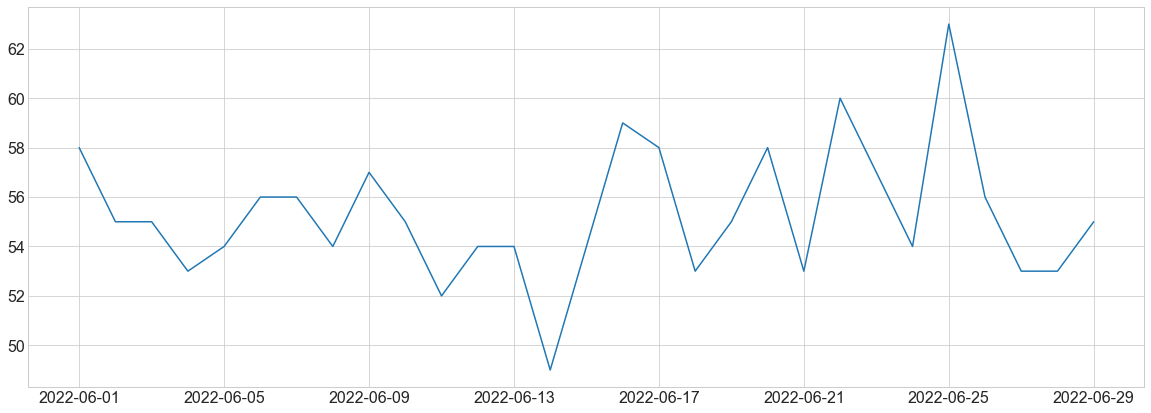

In [209]:
plt.plot(RestingHeartRate['2022-06'].value)

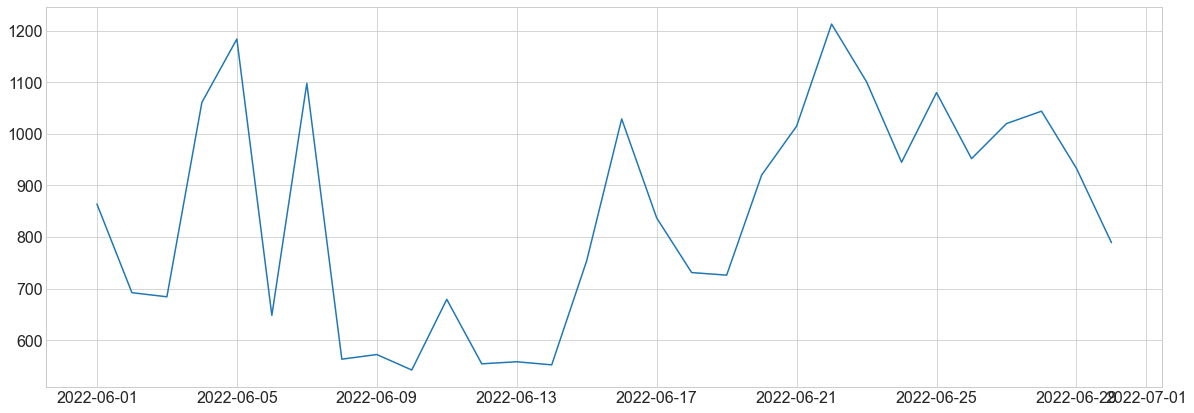

In [208]:
plt.plot(energy_burned['2022-06'].resample('d')[['value']].sum())

In [213]:
weight

activity_type         source    source_ver unit_of_measure  value  \
date                                                                           
2007-03-06      BodyMass             健康          15.5              kg  121.4   
2015-11-17      BodyMass             健康           9.1              kg  119.0   
2015-11-18      BodyMass             健康           9.1              kg  115.8   
2015-11-19      BodyMass             健康           9.1              kg  116.8   
2015-11-22      BodyMass             健康           9.1              kg  116.9   
2015-11-24      BodyMass             健康           9.1              kg  115.3   
2016-03-24      BodyMass             健康           9.3              kg  116.4   
2016-03-25      BodyMass             健康           9.3              kg  114.8   
2016-04-01      BodyMass             健康           9.3              kg  115.0   
2016-04-07      BodyMass             健康         9.3.1              kg  115.2   
2016-04-26      BodyMass             健康         9.3.1              kg  116.1   
2016-05-06      BodyMass             健康         9.3.1              kg  116.5   
2016-05-12      BodyMass             健康         9.3.1              kg  115.8   
2016-05-19      BodyMass             健康         9.3.2              kg  114.9   
2016-07-20      BodyMass             健康         9.3.2              kg  114.6   
2016-07-21      BodyMass             健康         9.3.2              kg  114.0   
2016-07-24      BodyMass             健康         9.3.2              kg  113.3   
2016-07-27      BodyMass             健康         9.3.2              kg  113.7   
2016-08-20      BodyMass             健康         9.3.4              kg  113.4   
2016-10-06      BodyMass             健康        10.0.2              kg  112.2   
2017-02-21      BodyMass             健康        10.2.1              kg  121.2   
2017-03-05      BodyMass             健康        10.2.1              kg  120.2   
2019-10-17      BodyMass             健康        15.4.1              kg  117.7   
2019-11-15      BodyMass             健康        15.4.1              kg  110.4   
2019-12-15      BodyMass           香山健康          6518              kg  106.6   
2019-12-15      BodyMass           香山健康          6518              kg  107.2   
2019-12-17      BodyMass             健康        15.4.1              kg  105.5   
2019-12-17      BodyMass           香山健康          6518              kg  105.5   
2019-12-20      BodyMass           香山健康          6518              kg  104.0   
2019-12-23      BodyMass           香山健康          6518              kg  102.9   
2019-12-25      BodyMass           香山健康          6518              kg  102.6   
2019-12-27      BodyMass           香山健康          6518              kg  102.7   
2020-01-01      BodyMass           香山健康          6518              kg  102.7   
2020-01-04      BodyMass           香山健康          6518              kg  101.6   
2020-01-06      BodyMass           香山健康          6518              kg  100.8   
2020-01-13      BodyMass           香山健康          6518              kg  100.7   
2020-01-20      BodyMass           香山健康          6518              kg   99.8   
2020-04-21      BodyMass           香山健康          6518              kg  104.7   
2020-05-05      BodyMass           香山健康          6518              kg  103.1   
2020-05-06      BodyMass           香山健康          6518              kg  102.2   
2020-05-11      BodyMass           香山健康          6518              kg  102.5   
2020-05-12      BodyMass           香山健康          6518              kg  102.0   
2020-05-13      BodyMass           香山健康          6518              kg  101.3   
2020-05-16      BodyMass           香山健康          6518              kg  101.3   
2020-05-19      BodyMass           香山健康          6518              kg  101.6   
2020-05-19      BodyMass           香山健康          6454              kg  102.2   
2020-05-25      BodyMass           香山健康          6518              kg  102.5   
2020-05-27      BodyMass           香山健康          6518              kg  101.9   
2020-05-28 

In [234]:
records_list[records_list.activity_type=='DietaryEnergyConsumed']

activity_type     source source_ver unit_of_measure  \
date                                                                      
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-06  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed   Lose It!          1             Cal   
2022-09-07  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-07  DietaryEnergyConsumed  FatSecret          8             Cal   
2022-09-07  DietaryEnergyConsumed  FatSecret 

In [214]:
daily_info = pd.DataFrame()

In [215]:
daily_info

Empty DataFrame
Columns: []
Index: []

In [218]:
daily_info['steps'] = step_counts.resample('D')[['value']].sum()

In [253]:
daily_info['weight'] = weight.resample('d')[['value']].mean()

In [254]:
daily_info['weight'] = daily_info['weight'].ffill()

In [224]:
daily_info['resting_hr'] = RestingHeartRate.resample('d')[['value']].mean()

In [226]:
daily_info['active_energy_burned'] = energy_burned.resample('d')[['value']].sum()

In [231]:
daily_info['exercise_time'] = AppleExerciseTime.resample('d')[['value']].sum()

In [238]:
daily_info['calorie_intake'] = records_list[(records_list.activity_type=='DietaryEnergyConsumed')&(records_list.source!='FatSecret')].resample('d')[['value']].sum()

In [250]:
daily_info['2021-11':].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 403 entries, 2021-11-01 to 2022-12-08
Freq: D
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   steps                 403 non-null    int64  
 1   weight                403 non-null    float64
 2   resting_hr            395 non-null    float64
 3   active_energy_burned  403 non-null    float64
 4   exercise_time         403 non-null    float64
 5   calorie_intake        94 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 22.0 KB


In [255]:
daily_info['2021-11':]

steps      weight  resting_hr  active_energy_burned  \
date                                                              
2021-11-01  30452  101.700000        64.0                2129.0   
2021-11-02  31742  101.700000        64.0                1698.0   
2021-11-03  33033  101.700000        60.0                 598.0   
2021-11-04  20454  103.500000        53.0                1457.0   
2021-11-05  34442  102.900000        68.0                 895.0   
2021-11-06  26034  102.900000        52.0                 463.0   
2021-11-07  34382  101.500000        52.0                2019.0   
2021-11-08  29392  101.500000        54.0                 712.0   
2021-11-09  30482  101.500000        58.0                1326.0   
2021-11-10  32612  101.800000        52.0                1035.0   
2021-11-11  34682  101.233333        61.0                1762.0   
2021-11-12  33473  101.233333        53.0                 525.0   
2021-11-13  27334  101.400000        60.0                1183.0   
2021-11-14  29586  101.400000        63.0                1651.0   
2021-11-15  30193  101.300000        64.0                 740.0   
2021-11-16  29074  101.200000        59.0                1801.0   
2021-11-17  34975  100.300000        60.0                 814.0   
2021-11-18  30485  100.100000        64.0                1613.0   
2021-11-19  31257  100.100000        63.0                 374.0   
2021-11-20  28448   99.800000        67.0                1665.0   
2021-11-21  24463   99.800000        56.0                1806.0   
2021-11-22  33246   99.800000        62.0                 456.0   
2021-11-23  23308   99.900000        61.0                1832.0   
2021-11-24  28581   99.700000        52.0                 588.0   
2021-11-25  25952   99.700000        60.0                1458.0   
2021-11-26  24677   99.700000        62.0                 459.0   
2021-11-27  25027   98.800000        59.0                 950.0   
2021-11-28  42062   98.800000        59.0                1930.0   
2021-11-29  31072   99.700000        61.0                 764.0   
2021-11-30  28105   99.400000        53.0                1815.0   
2021-12-01  31820   98.600000        57.0                 613.0   
2021-12-02  27666   98.100000        60.0                1610.0   
2021-12-03  32970   98.200000        59.0                 540.0   
2021-12-04  14577   98.200000        55.0                1043.0   
2021-12-05  31013   98.300000        59.0                1960.0   
2021-12-06  32977   98.200000        59.0                 615.0   
2021-12-07  24742   97.200000        58.0                1364.0   
2021-12-08  26594   97.300000        59.0                 565.0   
2021-12-09  21545   97.600000        58.0                2068.0   
2021-12-10  29290   98.400000        58.0                 627.0   
2021-12-11  32529   97.300000        58.0                 918.0   
2021-12-12  28847   97.000000        58.0                1320.0   
2021-12-13  30894   97.100000        65.0                 596.0   
2021-12-14  25149   96.300000        56.0                1725.0   
2021-12-15  28171   96.900000        63.0                 544.0   
2021-12-16  29845   96.900000        58.0                1603.0   
2021-12-17  28918   97.100000        57.0                 408.0   
2021-12-18  35629   96.100000        55.0                1231.0   
2021-12-19  23643   96.500000        58.0                1732.0   
2021-12-20  33261   95.600000        62.0                 814.0   
2021-12-21  34031   95.600000        63.0                1323.0   
2021-12-22  30080   95.600000        59.0                 955.0   
2021-12-23  22489   96.200000        56.0                1542.0   
2021-12-24  36202   95.600000        57.0                 801.0   
2021-12-25  22799   96.600000        58.0                 726.0   
2021-12-26  22156   96.900000        57.0                1020.0   
2021-12-27  23956   97.000000        57.0                 776.0   
2021-12-28  27936   95.600000        58.0                19

In [258]:
Workout = w.get_health_data('Workout')

In [291]:
Workout.head(6)

@workoutActivityType          @duration  \
0                       HKWorkoutActivityTypeWalking  46.09950688282649   
1  HKWorkoutActivityTypeHighIntensityIntervalTrai...  44.36107591589292   
2                  HKWorkoutActivityTypeCoreTraining  8.030133851369222   
3                    HKWorkoutActivityTypeElliptical  50.07879766623179   
4                       HKWorkoutActivityTypeWalking  13.93418342073758   
5                       HKWorkoutActivityTypeWalking  51.25693783362706   

  @durationUnit       @sourceName @sourceVersion  \
0           min  Mark的Apple Watch            8.0   
1           min  Mark的Apple Watch            8.0   
2           min  Mark的Apple Watch            8.0   
3           min  Mark的Apple Watch            8.0   
4           min  Mark的Apple Watch            8.0   
5           min  Mark的Apple Watch            8.0   

                                             @device  \
0  <<HKDevice: 0x2833a45f0>, name:Apple Watch, ma...   
1  <<HKDevice: 0x2833a45f0>, name:Apple Watch, ma...   
2  <<HKDevice: 0x2833a45f0>, name:Apple Watch, ma...   
3  <<HKDevice: 0x2833a45f0>, name:Apple Watch, ma...   
4  <<HKDevice: 0x2833a45f0>, name:Apple Watch, ma...   
5  <<HKDevice: 0x2833a45f0>, name:Apple Watch, ma...   

               @creationDate                 @startDate  \
0  2021-10-31 03:35:33 -0600  2021-10-31 02:49:27 -0600   
1  2021-10-31 20:09:11 -0600  2021-10-31 19:24:38 -0600   
2  2021-10-31 20:21:54 -0600  2021-10-31 20:09:11 -0600   
3  2021-10-31 21:11:59 -0600  2021-10-31 20:21:54 -0600   
4  2021-10-31 23:41:59 -0600  2021-10-31 23:28:02 -0600   
5  2021-11-01 21:46:45 -0600  2021-11-01 20:55:29 -0600   

                    @endDate  \
0  2021-10-31 03:35:32 -0600   
1  2021-10-31 20:09:11 -0600   
2  2021-10-31 20:21:54 -0600   
3  2021-10-31 21:11:59 -0600   
4  2021-10-31 23:41:58 -0600   
5  2021-11-01 21:46:45 -0600   

                                       MetadataEntry  \
0  [{'@key': 'HKAverageMETs', '@value': '6.90716 ...   
1  [{'@key': 'HKAverageMETs', '@value': '9.46258 ...   
2  [{'@key': 'HKAverageMETs', '@value': '5.6249 k...   
3  [{'@key': 'HKAverageMETs', '@value': '8.63696 ...   
4  [{'@key': 'HKAverageMETs', '@value': '5.46003 ...   
5  [{'@key': 'HKAverageMETs', '@value': '5.29714 ...   

                                        WorkoutEvent  \
0  [{'@type': 'HKWorkoutEventTypeSegment', '@date...   
1  {'@type': 'HKWorkoutEventTypePause', '@date': ...   
2  {'@type': 'HKWorkoutEventTypePause', '@date': ...   
3                                                NaN   
4  [{'@type': 'HKWorkoutEventTypeSegment', '@date...   
5  [{'@type': 'HKWorkoutEventTypeSegment', '@date...   

                                   WorkoutStatistics  
0  [{'@type': 'HKQuantityTypeIdentifierActiveEner...  
1  [{'@type': 'HKQuantityTypeIdentifierActiveEner...  
2  [{'@type': 'HKQuantityTypeIdentifierActiveEner...  
3  [{'@type': 'HKQuantityTypeIdentifierActiveEner...  
4  [{'@type': 'HKQuantityTypeIdentifierActiveEner...  
5  [{'@type': 'HKQuantityTypeIdentifierActiveEner...

In [292]:
Workout['MetadataEntry'][4]

[{'@key': 'HKAverageMETs', '@value': '5.46003 kcal/hr·kg'},
 {'@key': 'HKTimeZone', '@value': 'Asia/Shanghai'},
 {'@key': 'HKIndoorWorkout', '@value': '0'},
 {'@key': 'HKAverageMETs', '@value': '5.46003 kcal/hr·kg'},
 {'@key': 'HKTimeZone', '@value': 'Asia/Shanghai'},
 {'@key': 'HKIndoorWorkout', '@value': '0'}]

In [293]:
Workout['WorkoutStatistics'][4]

[{'@type': 'HKQuantityTypeIdentifierActiveEnergyBurned',
  '@startDate': '2021-10-31 23:28:02 -0600',
  '@endDate': '2021-10-31 23:41:58 -0600',
  '@sum': '81.6769',
  '@unit': 'Cal'},
 {'@type': 'HKQuantityTypeIdentifierDistanceWalkingRunning',
  '@startDate': '2021-10-31 23:28:02 -0600',
  '@endDate': '2021-10-31 23:41:58 -0600',
  '@sum': '1.01524',
  '@unit': 'km'},
 {'@type': 'HKQuantityTypeIdentifierBasalEnergyBurned',
  '@startDate': '2021-10-31 23:28:02 -0600',
  '@endDate': '2021-10-31 23:41:58 -0600',
  '@sum': '29.9427',
  '@unit': 'Cal'}]

In [294]:
Workout['WorkoutEvent'][4]

[{'@type': 'HKWorkoutEventTypeSegment',
  '@date': '2021-10-31 23:28:02 -0600',
  '@duration': '13.80741251707077',
  '@durationUnit': 'min'},
 {'@type': 'HKWorkoutEventTypeSegment',
  '@date': '2021-10-31 23:41:51 -0600',
  '@duration': '0.05933314760526021',
  '@durationUnit': 'min'}]